# Integration rules in NGSolve

In [1]:
from ngsolve import *
from ngsolve.webgui import Draw

In NGSolve an `IntegrationRule` for finite element meshes is defined on the respective reference element. E.g. for a triangle `TRIG` the reference element has the vertices $(0,0),(1,0),(0,1)$, 

In [2]:
k = 4

intrule = IntegrationRule(TRIG,k) #returns an integration rule of at least order k
print(intrule)

 locnr = 0: (0.816848, 0.0915762, 0), weight = 0.0549759
 locnr = 1: (0.0915762, 0.816848, 0), weight = 0.0549759
 locnr = 2: (0.0915762, 0.0915762, 0), weight = 0.0549759
 locnr = 3: (0.108103, 0.445948, 0), weight = 0.111691
 locnr = 4: (0.445948, 0.108103, 0), weight = 0.111691
 locnr = 5: (0.445948, 0.445948, 0), weight = 0.111691



An `IntegrationRule` consists of `IntegrationPoints` which have a position and a weight:

point:  (0.816847572980459, 0.091576213509771, 0.0)
weight:  0.054975871827661
point:  (0.091576213509771, 0.816847572980459, 0.0)
weight:  0.054975871827661
point:  (0.091576213509771, 0.091576213509771, 0.0)
weight:  0.054975871827661
point:  (0.10810301816807, 0.445948490915965, 0.0)
weight:  0.111690794839005
point:  (0.445948490915965, 0.10810301816807, 0.0)
weight:  0.111690794839005
point:  (0.445948490915965, 0.445948490915965, 0.0)
weight:  0.111690794839005


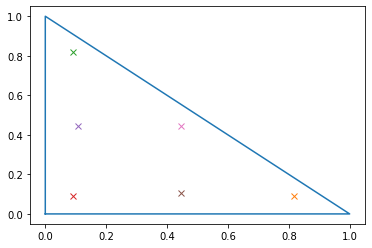

In [3]:
import matplotlib.pyplot as pl

pl.plot([0,1,0,0],[0,0,1,0])
for ip in intrule:
    print("point: ", ip.point)
    print("weight: ", ip.weight)
    pl.plot(ip.point[0],ip.point[1],'x')

We may check the accuracy of the integration rule by using `IntegrationRule.Integrate(f)` for a `lambda` function `f` on the reference element.

In [4]:
intrule = IntegrationRule(TRIG, 5)

for i in range(10):
    intrule_ref = IntegrationRule(TRIG,i+2)
    int_ref = intrule_ref.Integrate(lambda x,y: x**i)
    int_approx = intrule.Integrate(lambda x,y: x**i)
    print("Polynomial of order {}: error =  {}".format(i, abs(int_ref-int_approx)))

Polynomial of order 0: error =  1.942890293094024e-15
Polynomial of order 1: error =  8.326672684688674e-17
Polynomial of order 2: error =  1.249000902703301e-16
Polynomial of order 3: error =  0.0
Polynomial of order 4: error =  0.0
Polynomial of order 5: error =  4.961309141293668e-16
Polynomial of order 6: error =  1.5855372570428017e-15
Polynomial of order 7: error =  2.750544061753263e-06
Polynomial of order 8: error =  4.881966328910969e-06
Polynomial of order 9: error =  7.801460834254426e-07


Integration over a finite element `Mesh` can be done by supplying the integration rule(s) (if more than one type of element is present in the mesh)

In [5]:
mesh = Mesh(unit_square.GenerateMesh(maxh=0.2))
Draw(mesh)
print(Integrate(sin(6*pi*x)*sin(10*pi*y)*dx(intrules = {TRIG: IntegrationRule(TRIG,0)}),mesh))

WebGuiWidget(value={'gui_settings': {}, 'ngsolve_version': '6.2.2402-37-g45ed24bde', 'mesh_dim': 2, 'order2d':…

-0.024473463319343535


For mesh refinement we should observe convergence:

In [6]:
import numpy as np

mesh = Mesh(unit_square.GenerateMesh(maxh=0.2))

intorders = [0,1,2,3,4]
refinements = 6
errors = np.zeros((refinements,len(intorders)))
hs =     np.ones((refinements,len(intorders)))
for i in range(refinements):
    print("refinement: ", i)
    for j in range(len(intorders)):
        print("order = {}".format(intorders[j]))
        intrules = {TRIG: IntegrationRule(TRIG, intorders[j])}
        integral = abs(Integrate(sin(6*pi*x)*sin(10*pi*y)*dx(intrules = intrules),mesh))
        errors[i,j]=integral
        hs[i,j]=1/2**i
    mesh.Refine()
    

refinement:  0
order = 0
order = 1
order = 2
order = 3
order = 4
refinement:  1
order = 0
order = 1
order = 2
order = 3
order = 4
refinement:  2
order = 0
order = 1
order = 2
order = 3
order = 4
refinement:  3
order = 0
order = 1
order = 2
order = 3
order = 4
refinement:  4
order = 0
order = 1
order = 2
order = 3
order = 4
refinement:  5
order = 0
order = 1
order = 2
order = 3
order = 4


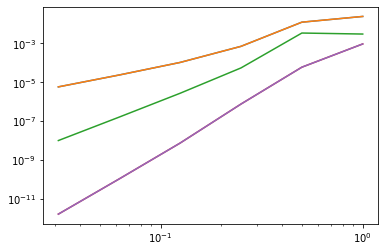

In [7]:
pl.loglog(hs,errors);

For mixed meshes we also need an integration rule for quads:

In [55]:
from netgen.occ import *
geo = OCCGeometry(Rectangle(1,1).Face()-MoveTo(0.3,0.3).Rectangle(0.2,0.2).Face(),dim=2)

mesh = Mesh(geo.GenerateMesh(maxh=0.3,quad_dominated=True))
Draw(mesh)

intorders = [0,1,2]
refinements = 7
errors = np.zeros((refinements,len(intorders)))
hs =     np.ones((refinements,len(intorders)))

intrules_ref = {TRIG: IntegrationRule(TRIG, 20), QUAD:IntegrationRule(QUAD,20)}
integral_ref = Integrate(sin(x)*sin(y)*dx(intrules = intrules_ref),mesh)
for i in range(refinements):
    print("refinement: ", i)
    for j in range(len(intorders)):
        print("order = {}".format(intorders[j]))
        intrules = {TRIG: IntegrationRule(TRIG, intorders[j]),QUAD: IntegrationRule(QUAD, intorders[j])}
        integral = Integrate(sin(x)*sin(y)*dx(intrules = intrules),mesh)
        errors[i,j] = abs(integral-integral_ref)
        hs[i,j]=1/2**i
    mesh.Refine()


WebGuiWidget(value={'gui_settings': {}, 'ngsolve_version': '6.2.2402-37-g45ed24bde', 'mesh_dim': 2, 'order2d':…

refinement:  0
order = 0
order = 1
order = 2
refinement:  1
order = 0
order = 1
order = 2
refinement:  2
order = 0
order = 1
order = 2
refinement:  3
order = 0
order = 1
order = 2
refinement:  4
order = 0
order = 1
order = 2
refinement:  5
order = 0
order = 1
order = 2
refinement:  6
order = 0
order = 1
order = 2


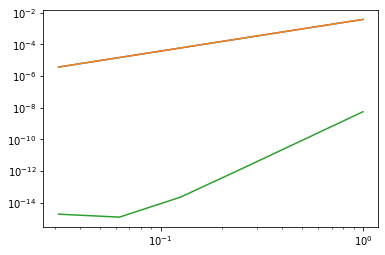

In [54]:
pl.loglog(hs,errors);

One may also create an own integration rule:

In [80]:
my_intrule_trig = IntegrationRule([(0,0),(1,0),(0,1)],[1/6,1/6,1/6])
my_intrule_quad = IntegrationRule([(0,0),(1,0),(0,1),(1,1)],[1/4,1/4,1/4,1/4])

In [81]:
geo = OCCGeometry(Rectangle(1,1).Face()-MoveTo(0.3,0.3).Rectangle(0.2,0.2).Face(),dim=2)

mesh = Mesh(geo.GenerateMesh(maxh=0.3,quad_dominated=True))
Draw(mesh)

intrules_ref = {TRIG: IntegrationRule(TRIG, 20), QUAD:IntegrationRule(QUAD,20)}
integral_ref = Integrate(sin(x)*sin(y)*dx(intrules = intrules_ref),mesh)
refinements = 6
errors = []
hs = []
for i in range(refinements):
        intrules = {TRIG: my_intrule_trig,QUAD: my_intrule_quad}
        integral = Integrate(sin(x)*sin(y)*dx(intrules = intrules),mesh)
        errors.append(abs(integral-integral_ref))
        hs.append(1/2**i)
        mesh.Refine()

WebGuiWidget(value={'gui_settings': {}, 'ngsolve_version': '6.2.2402-37-g45ed24bde', 'mesh_dim': 2, 'order2d':…

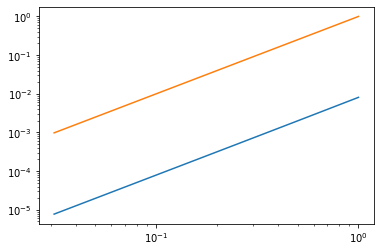

In [82]:
pl.loglog(hs,errors);
pl.loglog(hs,[h**2 for h in hs]);